# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years
Nationality: Players nationality
Overall: Player overall performance score (higher better)
Potential: Player potential score (higher better)
Club: Player home soccer club
Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)
Wage: Player stipend (higher better)
Preferred Foot: Player preferred foot to play
International Reputation: Player international fame (higher better)
Week Foot: Performance score of player weak foot (higher better)
Skill Moves: Player move skill score (higher better)
Body Type: Player body type
Position: Position player holds on the pitch
Height: Player height in CM
Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

/Users/gui/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/gui/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/66/2ns57n694c73kqb8g2svdw_r0000gn/T/ipykernel_63025/1007080505.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


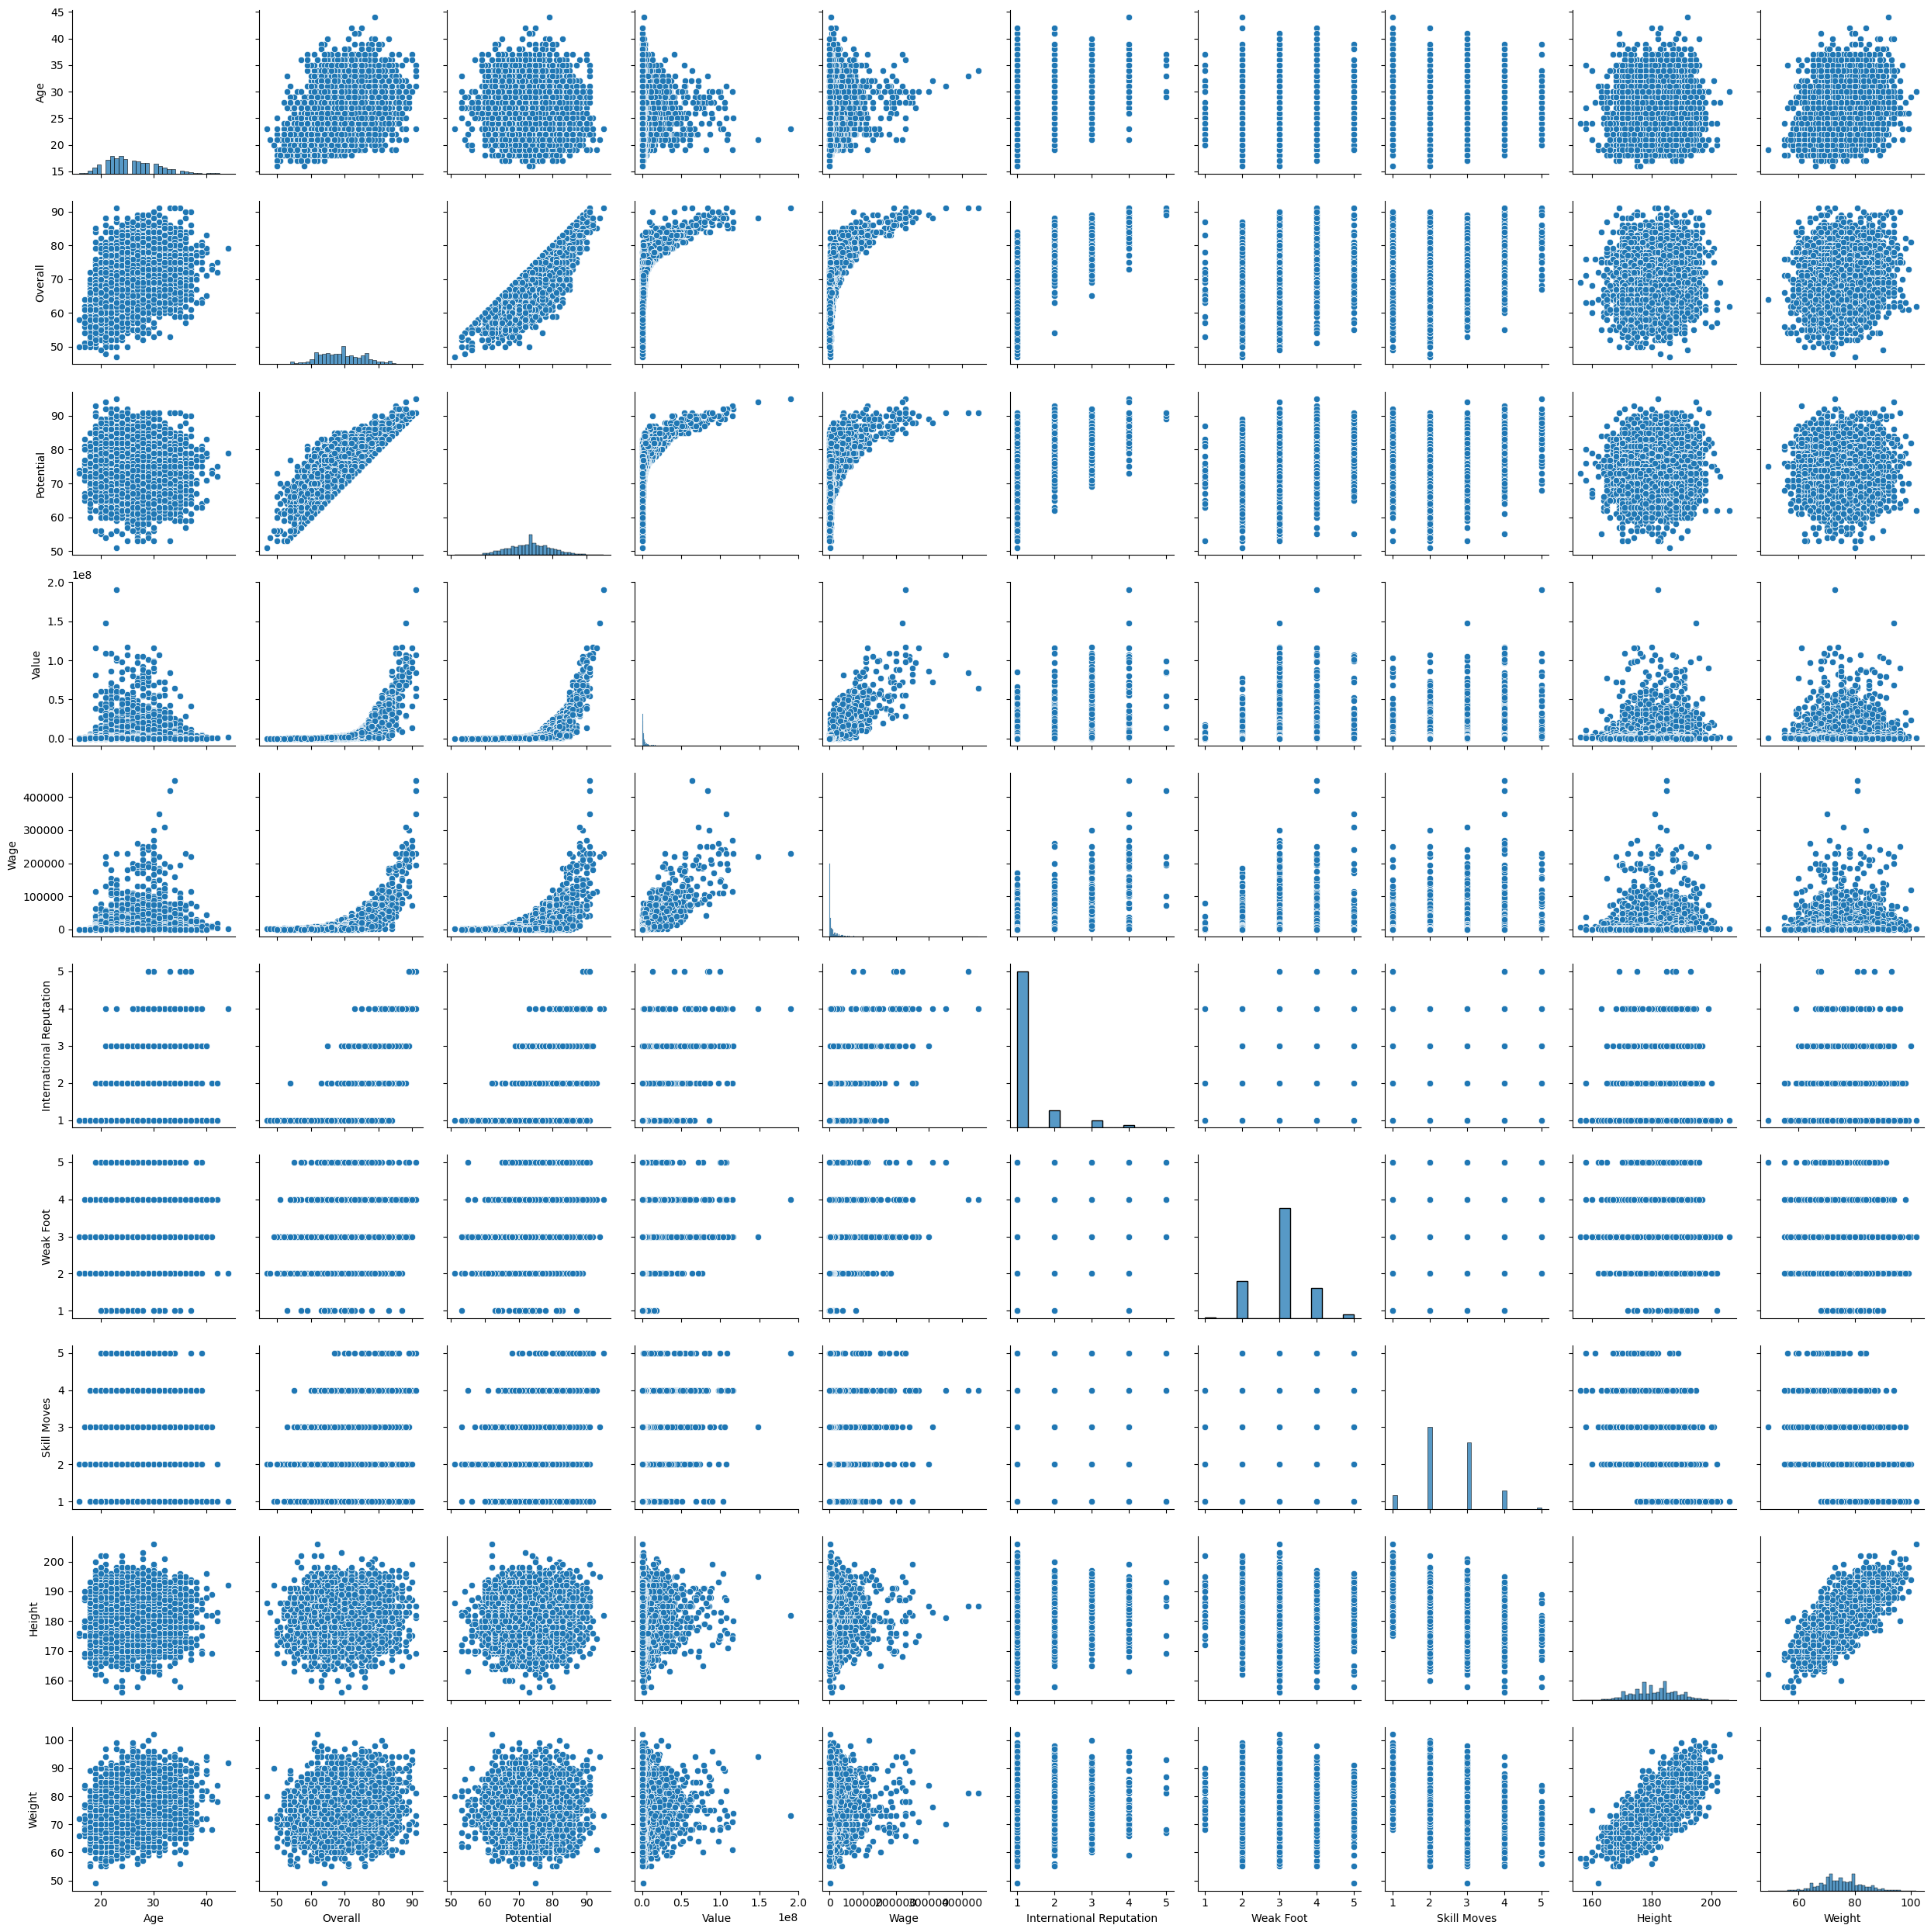

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = pd.read_csv('Dataset_Assignment1.csv')
dataset.head()

# Exploratory Data Analysis (EDA)
numericalColumns = ["Age", "Overall", "Potential", "Value", "Wage", "International Reputation", "Weak Foot", "Skill Moves", "Height", "Weight"]
sns.pairplot(dataset[numericalColumns], size=2.5)
plt.tight_layout()
plt.show()

**Answer to 4**:


Data exploration and visualization are crucial for understanding data characteristics, detecting anomalies, and informing model selection. By visualizing the data, you can uncover trends like skewed distributions, outliers, and missing data patterns that can impact model performance.

# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

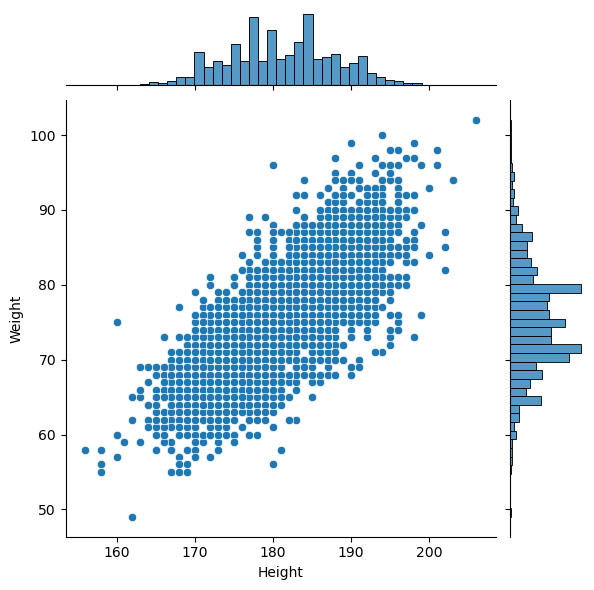

c:\Users\Richard Augustine\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


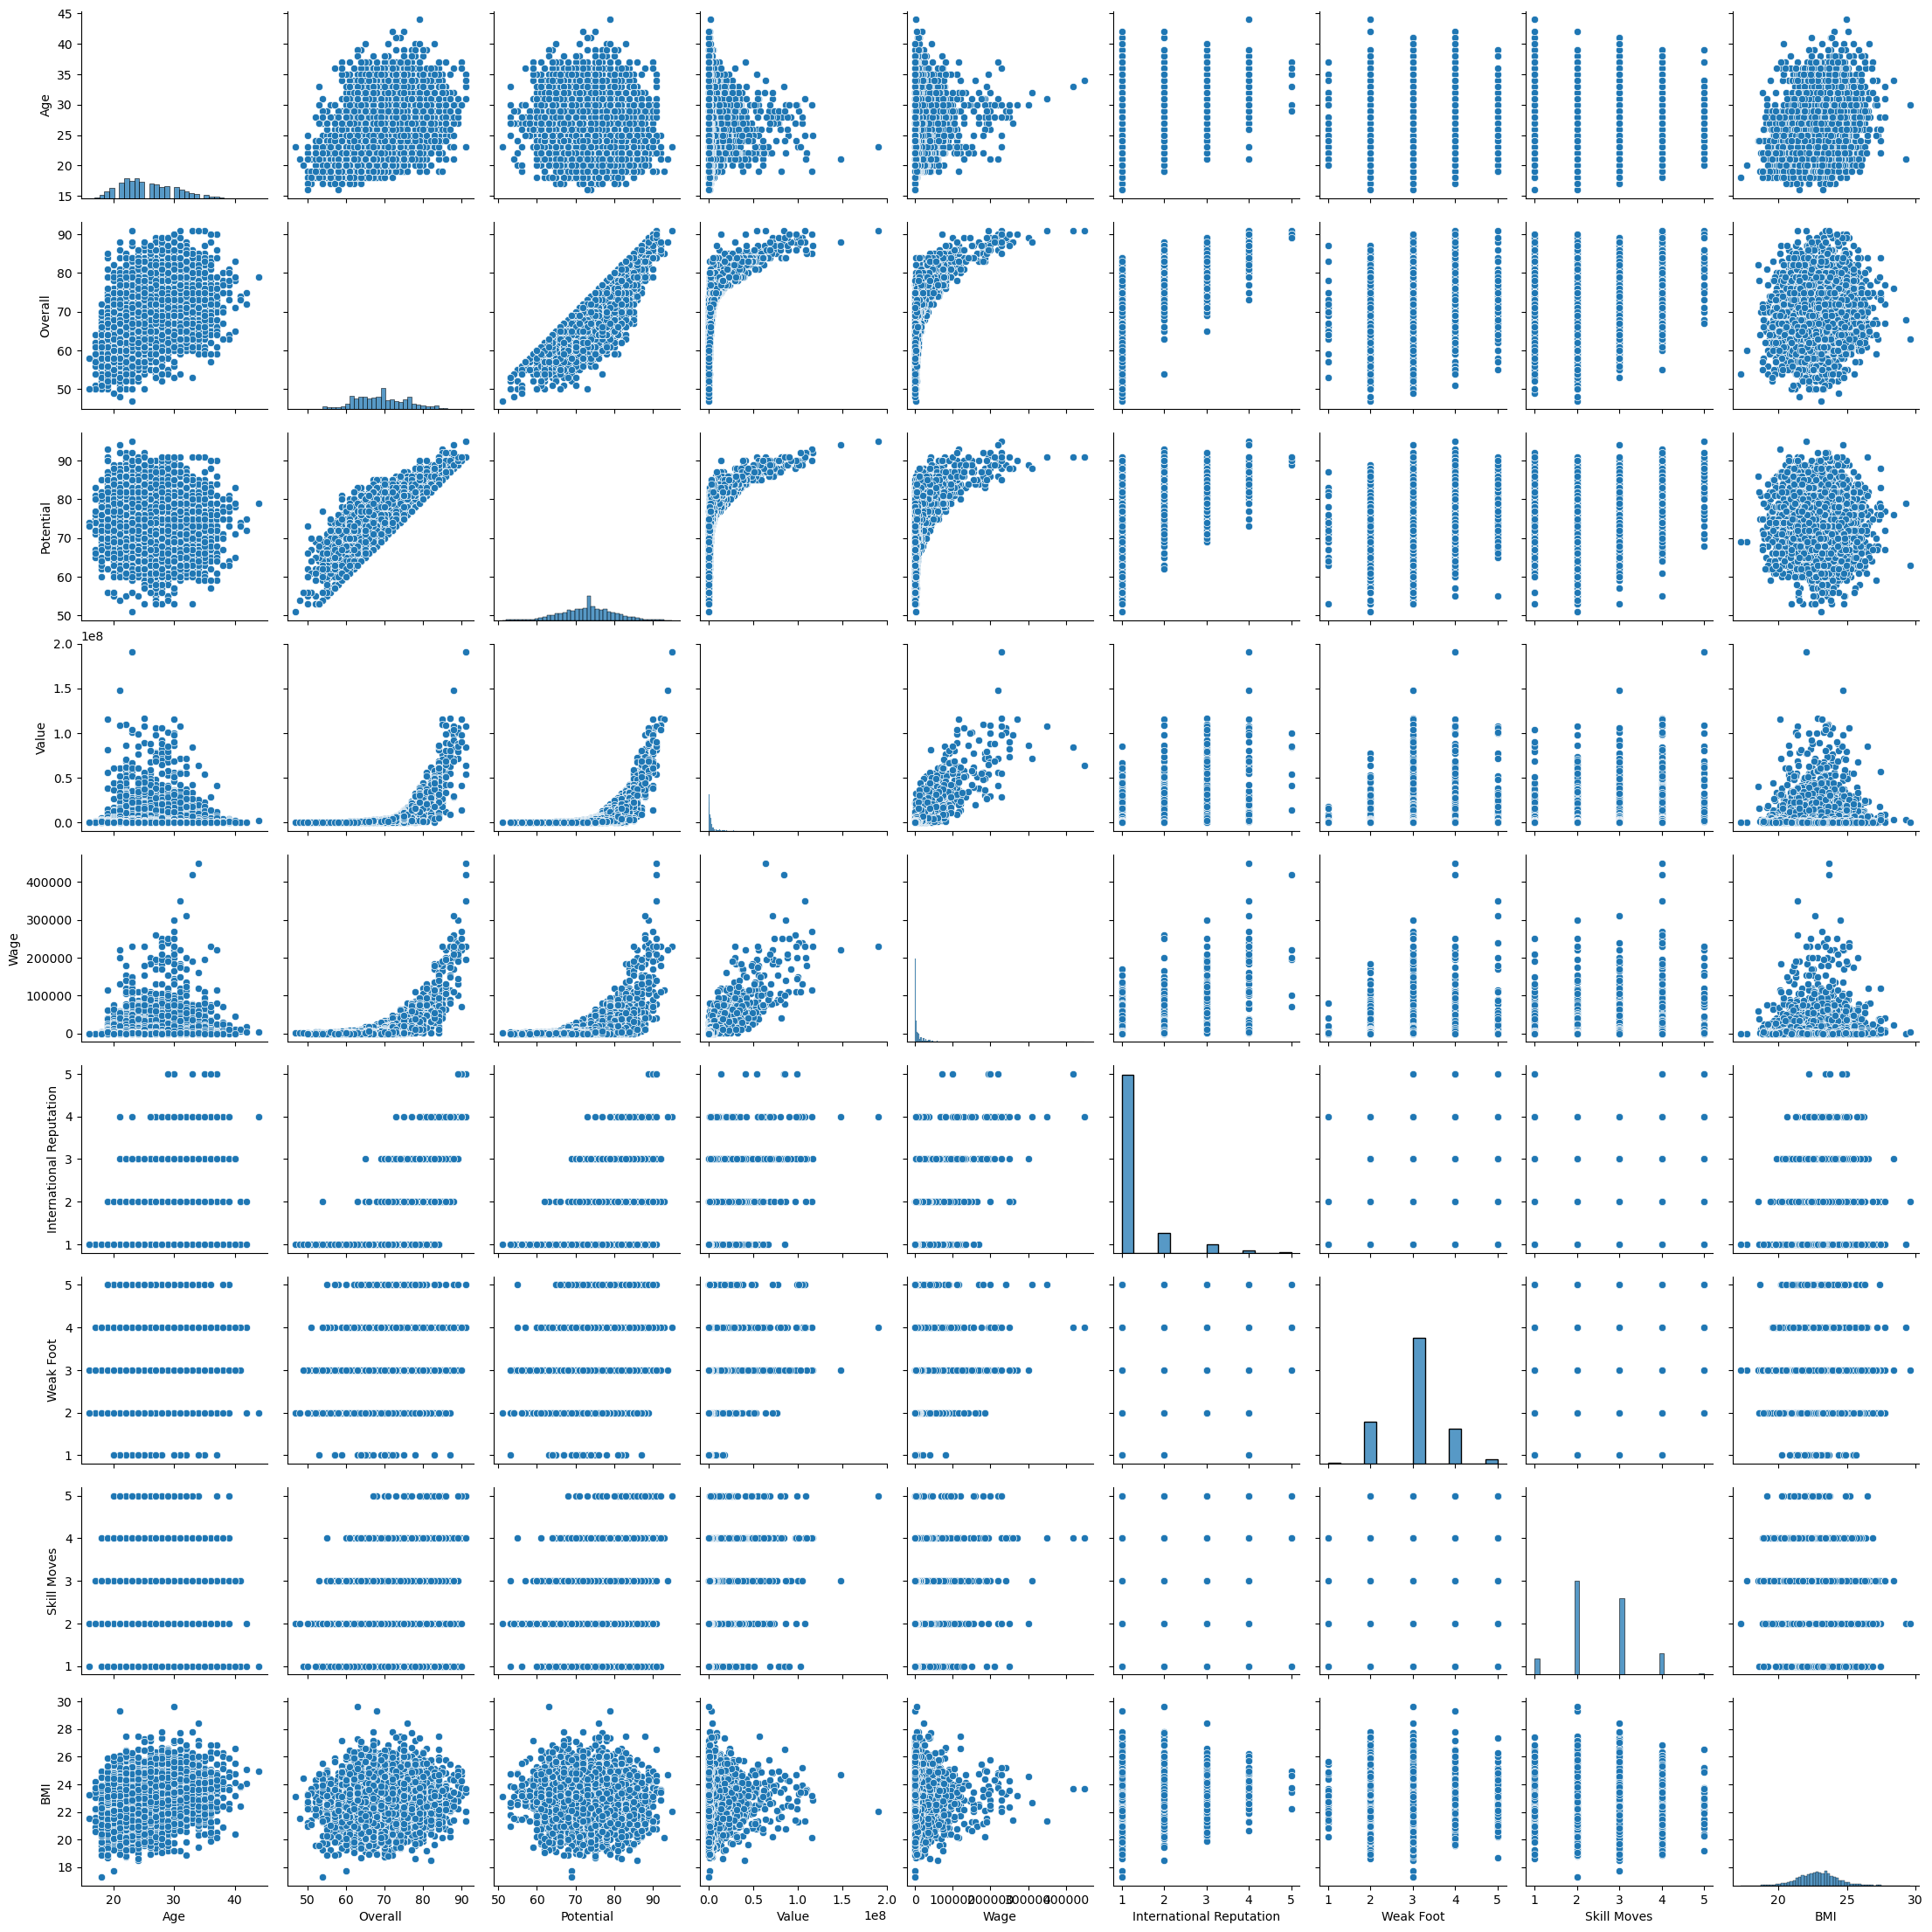

In [9]:
# Create joint distribution plot between Height and Weight
sns.jointplot(x='Height', y='Weight', data=dataset, kind='scatter')
plt.show()

# Convert Height (cm) to Height Meters (m) for BMI calculation
dataset['Height Meters'] = dataset['Height'] / 100

# Derive BMI
dataset['BMI'] = dataset['Weight'] / dataset['Height Meters']**2

# Drop Height and Weight columns
dataset = dataset.drop(['Height', 'Weight', 'Height Meters'], axis=1)

# Create pairplot with the remaining columns including BMI
columns = ["Age", "Overall", "Potential", "Value", "Wage", "International Reputation", "Weak Foot", "Skill Moves", "BMI"]
sns.pairplot(dataset[columns], height=2.5)
plt.show()


# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

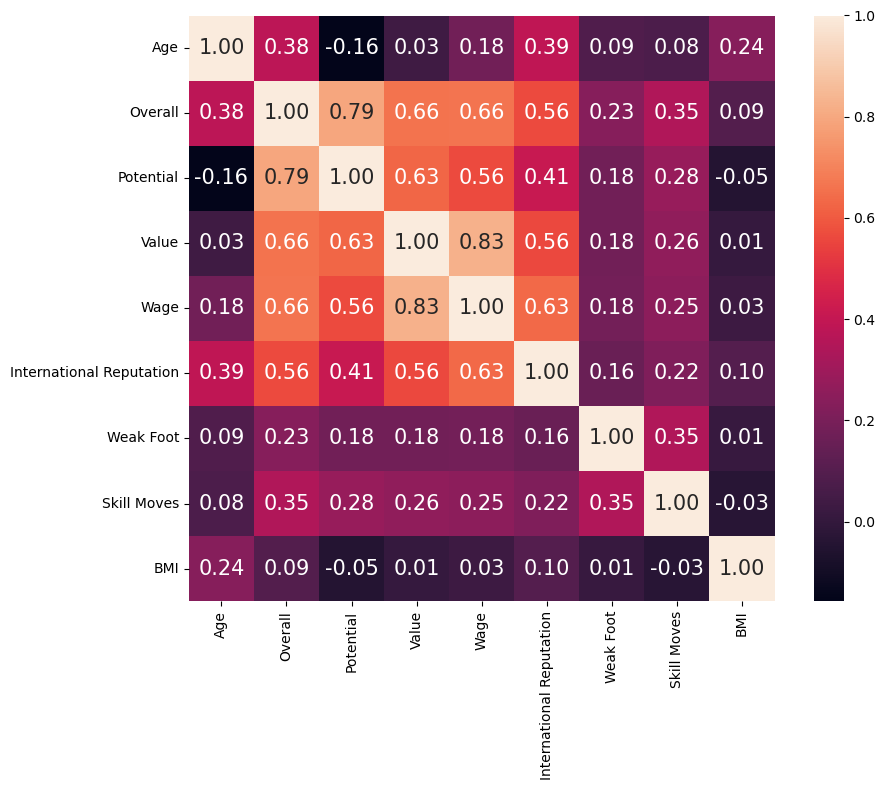

In [37]:
import numpy as np

# Determine numerical features
numerical_features = columns
# Drop weight and height
numerical_features.remove("Weight")
numerical_features.remove("Height Meters")

# Create correlation heatmap
plt.figure(figsize=(10, 8))
cm = np.corrcoef(dataset[numerical_features].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=numerical_features,
                 xticklabels=numerical_features)

plt.tight_layout()
plt.show()

**Answer to 4**: 


Correlation measures the linear relationship between two variables. A higher correlation coefficient indicates a stronger linear relationship, either positive or negative. However, a high correlation doesn't always imply a strong causal relationship. Confounding variables, non-linear relationships, and reverse causation can all affect correlation. Therefore, it's crucial to consider domain knowledge and other factors when interpreting correlation values and selecting features for modeling.

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

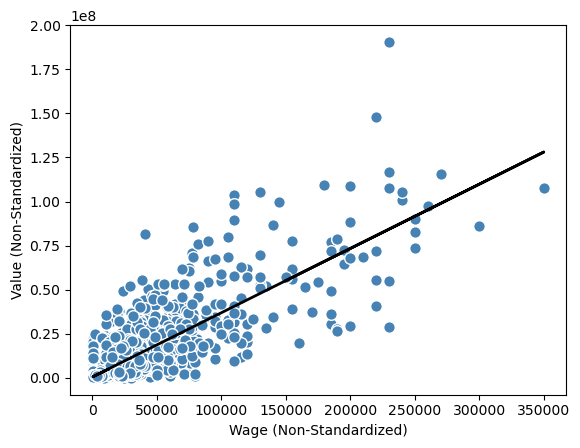

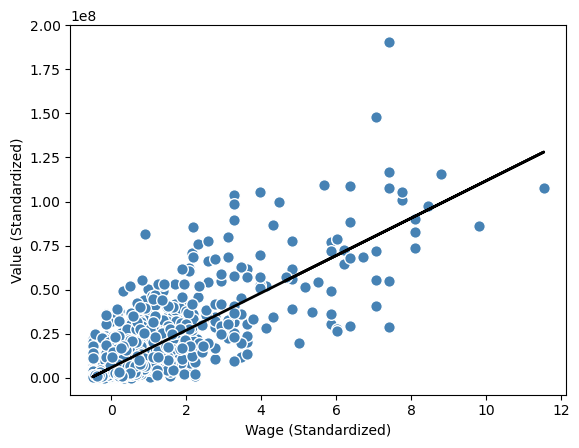

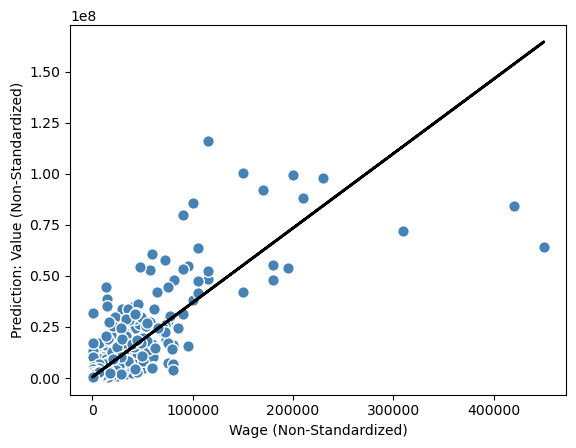

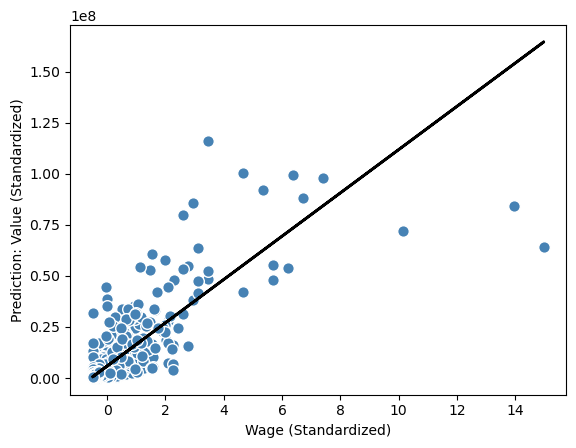

Non-Standardized R²: 0.6093282093755403
Non-Standardized RMSE: 8023506.577362568
Standardized R²: 0.6093282093755401
Standardized RMSE: 8023506.577362569


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Selecting highly correlated feature
x = dataset[['Wage']].values
y = dataset[['Value']].values

# Splitting the data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

# Rebuild non-standardized model
lr_non_std = LinearRegression()
lr_non_std.fit(x_train, y_train)

# Rebuild standardized model
lr_std = LinearRegression()
lr_std.fit(x_train_std, y_train)

# Plotting function
def lin_regplot(x, y, model):
    plt.scatter(x, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(x, model.predict(x), color='black', lw=2)    
    return

# Visualizing non-standardized training
lin_regplot(x_train, y_train, lr_non_std)
plt.xlabel('Wage (Non-Standardized)')
plt.ylabel('Value (Non-Standardized)')
plt.show()

# Visualizing standardized training
lin_regplot(x_train_std, y_train, lr_std)
plt.xlabel('Wage (Standardized)')
plt.ylabel('Value (Standardized)')
plt.show()

# Visualizing non-standardized predictions
y_pred_test = lr_non_std.predict(x_test)
lin_regplot(x_test, y_test, lr_non_std)
plt.xlabel('Wage (Non-Standardized)')
plt.ylabel('Prediction: Value (Non-Standardized)')
plt.show()

# Visualizing standardized predictions
y_pred_test_std = lr_std.predict(x_test_std)
lin_regplot(x_test_std, y_test, lr_std)
plt.xlabel('Wage (Standardized)')
plt.ylabel('Prediction: Value (Standardized)')
plt.show()

# Evaluating model performance
# R² and RMSE for non-standardized data
r2_non_std = r2_score(y_test, y_pred_test)
rmse_non_std = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'Non-Standardized R²: {r2_non_std}')
print(f'Non-Standardized RMSE: {rmse_non_std}')

# R² and RMSE for standardized data
r2_std = r2_score(y_test, y_pred_test_std)
rmse_std = mean_squared_error(y_test, y_pred_test_std, squared=False)
print(f'Standardized R²: {r2_std}')
print(f'Standardized RMSE: {rmse_std}')


**Answer to 7**: Linear regression takes advatage of the differences between output value and the modelled value to adjust the precision (weights and bias) of the predictions to fit the model better. However, it does so iteratively, meaning that having points that are too distinct from each other in the graph would require a lot of iterations to solve for and, therefore, make the process less efficient. Normalizing tackles this issue by putting all values into a some standard that usually falls between 0 adn 1, which decreases the disparity in values and improves the quality of the output data.

**Answer to 9**: Even though with a high correlation, simple regression models struggle with the disparity in values. Having numbers that fall out of the general pattern will cause the predictions to be innacurate as there is a limited amount of iterations for the weight and bias adjustment to be done precisely.

# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.3, 0.6, and 0.8).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

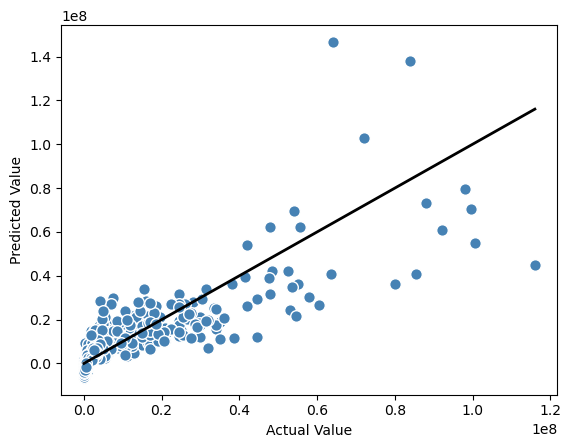

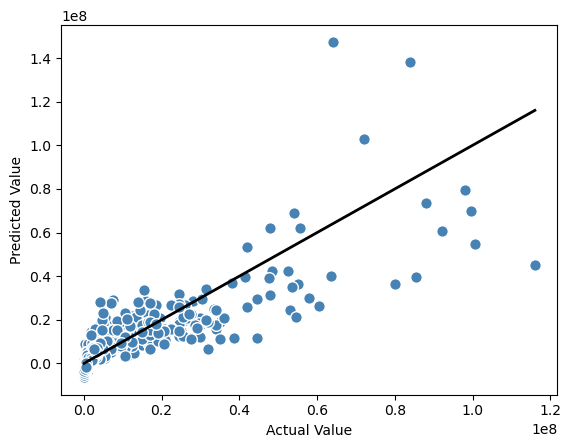

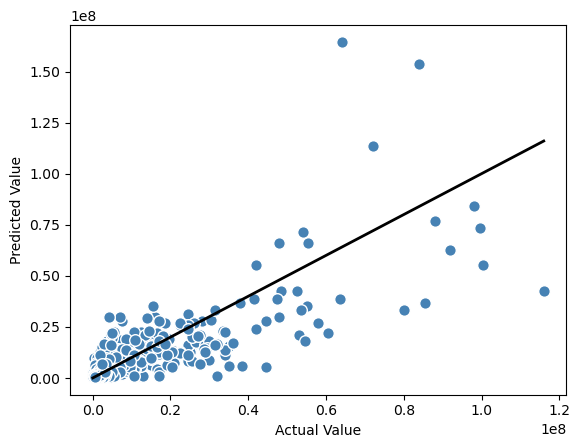

Model with correlation > 0.3: R² (Train): 0.7295394751479685, RMSE (Train): 6592747.073625668, R² (Test): 0.6785311682253814, RMSE (Test): 7278260.949551909
Model with correlation > 0.6: R² (Train): 0.7293315190994821, RMSE (Train): 6595281.155434206, R² (Test): 0.6764232568921196, RMSE (Test): 7302084.194000978
Model with correlation > 0.8: R² (Train): 0.6976449584337034, RMSE (Train): 6970646.814868308, R² (Test): 0.6093282093755401, RMSE (Test): 8023506.577362569


In [37]:
# feature sets selected based on correlations 0.3, 0.6, and 0.8 with Value
features_03 = ['International Reputation', 'Overall', 'Potential', 'Wage']
features_06 = ['Overall', 'Potential', 'Wage']
features_08 = ['Wage']

# split the dataset into training and testing sets
def split_and_train(features, target='Value'):
    X = dataset[features].values
    y = dataset[[target]].values
    
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # train model
    model = LinearRegression()
    model.fit(X_train_std, y_train)
    
    # predictions
    y_pred_train = model.predict(X_train_std)
    y_pred_test = model.predict(X_test_std)
    
    # evaluate model
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    
    # plot actual vs predicted for test set
    plt.scatter(y_test, y_pred_test, c='steelblue', edgecolor='white', s=70)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.show()

    return r2_train, rmse_train, r2_test, rmse_test

# model for correlation > 0.3
r2_train_03, rmse_train_03, r2_test_03, rmse_test_03 = split_and_train(features_03)

# model for correlation > 0.6
r2_train_06, rmse_train_06, r2_test_06, rmse_test_06 = split_and_train(features_06)

# model for correlation > 0.8
r2_train_08, rmse_train_08, r2_test_08, rmse_test_08 = split_and_train(features_08)

# display the results
print(f"Model with correlation > 0.3: R² (Train): {r2_train_03}, RMSE (Train): {rmse_train_03}, R² (Test): {r2_test_03}, RMSE (Test): {rmse_test_03}")
print(f"Model with correlation > 0.6: R² (Train): {r2_train_06}, RMSE (Train): {rmse_train_06}, R² (Test): {r2_test_06}, RMSE (Test): {rmse_test_06}")
print(f"Model with correlation > 0.8: R² (Train): {r2_train_08}, RMSE (Train): {rmse_train_08}, R² (Test): {r2_test_08}, RMSE (Test): {rmse_test_08}")

**Answer to 4**: When deciding which features to include in a multiple linear regression model, we should focus on choosing features that are logically related to the target variable (for example, 'Wage' is closely correlated with 'Value') and not missing any information. The challenges associated with using too many features is overfitting , increasing training time, and reduces performance. 

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

**Answer to 2**: 

**Answer to 3**: 

**Answer to 4**: 